In [399]:
asdf=1

1

In [1]:
using Intervalos, Graficador, AutoDif
using PyPlot

INFO: Loading help data...


#[1]
#### Escribe una función que calcule el operador de Newton para un intervalo $X$, dadas $f(x)$ y $f′(x)$.

In [2]:
ptomedio(x::Intervalo)= (x.a + x.b)/2

newtonIntervalo(x::Intervalo,f::Function,ff::Function)= Intervalo(ptomedio(x)) - f(Intervalo(ptomedio(x)))/ff(x)

newtonIntervalo (generic function with 1 method)

Voy a implementar un par de funciones que den la unión o intersección de un par de intervalos. Si los intervalos no se intersectan las funciones arrojan un error

In [3]:
uNir(x::Intervalo,y::Intervalo) = (x.a<=y.b && y.a<=x.b) ? Intervalo(min(x.a,y.a),max(x.b,y.b)) : 
                                                                return("Deben ser intervalos que se intersectan")
iNtersectar(x::Intervalo,y::Intervalo) = (x.a<=y.b && y.a<=x.b) ? Intervalo(max(x.a,y.a),min(x.b,y.b)) : 
                                                                return("Deben ser intervalos que se intersectan")

iNtersectar (generic function with 1 method)

#[2]
#### Implementa el método de Newton para intervalos para encontrar las raíces de $f(x)=x^3−1$ a partir de $X=[−3,3]$. Muestra gráficamente la implementación del método. En cada iteración subsecuente del método, ilustra qué le pasa al diámetro de la refincación del intervalo que vas obteniendo.

In [403]:
function cerosNewtonAux(x::Intervalo,f::Function,ff::Function,n::Int64)
    if in(0.0,ff(x))
        if ff(x).a<0.0 && ff(x).b>0.0 #x.a<0.0 && x.b>0.0
            return "El intervalo de la derivada contiene al cero"
        end
    end
    if typeof(iNtersectar(x,newtonIntervalo(x,f,ff)))==ASCIIString
        return "El intervalo elegido no contiene ceros de $f(x)"
    end
    if n>100
        println(x)
        return "Más de 100 iteraciones"
    elseif abs(redonUP(-,x.b,x.a))<2.0^-30 
        return x
    else
        n+=1
        cerosNewtonAux( iNtersectar(x,newtonIntervalo(x,f,ff))  , f , ff , n)
    end
end

cerosNewton(x::Intervalo,f::Function,ff::Function)=cerosNewtonAux(x::Intervalo,f::Function,ff::Function,1)

cerosNewton (generic function with 2 methods)

In [404]:
f1(x)=x^3-1
f2(x)=3*x^2
interv1=Intervalo(-3,3)
cerosNewton(interv1,f1,f2)

[9.999999999996766945433800838764672234217058898840182419042737791180041684117653e-01,
1.00000000000035560775191859952649349832031965423996115501097468381781371997584e+00]

In [405]:
interv1=Intervalo(3e-02,3)
cerosNewton(interv1,f1,f2)

[9.999999999996638396386008709155080217012860753066769572114956244718861318173878e-01,
1.000000000000370042584027206015784751339542262885839885826171619502992567418929e+00]

In [406]:
interv1=Intervalo(0,3)
cerosNewton(interv1,f1,f2)

[9.999999999996455746958370586872576732910155438046615480108400544854991344102032e-01,
1.00000000000039142809569346024873314200851275964043658576342252110557003319485e+00]

Lo siguiente es una representación gráfica de lo que hace el método. Para hacerlo amigable con nosotros solo hice las primeras tres iteraciones.

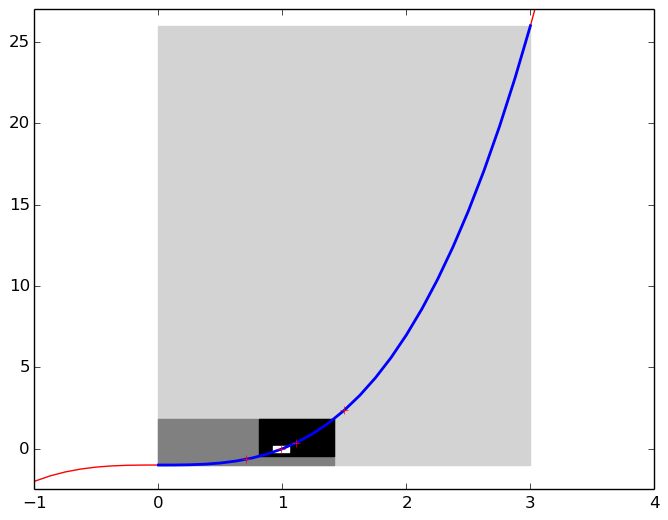

In [407]:
eme=ptomedio(interv1)
graficaarea(float64(interv1.a),float64(interv1.b),f1)
PyPlot.plot(Float64[eme],Float64[f1(eme)],"+r")

interv2=newtonIntervalo(interv1,f1,f2)
interv3=iNtersectar(interv1,interv2)
polY=f1(interv3)
PyPlot.fill_between(Float64[interv3.a,interv3.b],float64(polY.a),float64(polY.b),color="gray")
eme=ptomedio(interv3)
PyPlot.plot(Float64[eme],Float64[f1(eme)],"+r")

interv4=newtonIntervalo(interv3,f1,f2)
interv5=iNtersectar(interv3,interv4)
polY=f1(interv5)
PyPlot.fill_between(Float64[interv5.a,interv5.b],float64(polY.a),float64(polY.b),color="black")
eme=ptomedio(interv5)
PyPlot.plot(Float64[eme],Float64[f1(eme)],"+r")

interv6=newtonIntervalo(interv5,f1,f2)
interv7=iNtersectar(interv5,interv6)
polY=f1(interv7)
PyPlot.fill_between(Float64[interv7.a,interv7.b],float64(polY.a),float64(polY.b),color="white")
eme=ptomedio(interv7)
PyPlot.plot(Float64[eme],Float64[f1(eme)],"+r")
;

Ahora voy a implementar el método con diferenciación automática, para lo cual agregué la siguiente linea al módulo AutoDif:
`ValorDeriv(x::Intervalo)=ValorDeriv(x,Intervalo(1.0))`

In [15]:
methods(ValorDeriv)

# 3 methods for generic function "ValorDeriv":
ValorDeriv(x::Intervalo) at /home/santiago/Documentos/Escuela-maestría/1er-semestre/Física-computacional/Clase/MisModulos/AutoDif/src/AutoDif.jl:19
ValorDeriv(valor,deriv)
ValorDeriv(valor) at /home/santiago/Documentos/Escuela-maestría/1er-semestre/Física-computacional/Clase/MisModulos/AutoDif/src/AutoDif.jl:18

In [409]:
newtonIntervalo(x::Intervalo,f::Function)= Intervalo(ptomedio(x)) - f(Intervalo(ptomedio(x)))/(f(ValorDeriv(x)).deriv)

function cerosNewtonAux(x::Intervalo,f::Function,n::Int64)
    y=f(ValorDeriv(x))
    if in(0.0,y.deriv)
        if y.deriv.a<0.0 && y.deriv.b>0.0 
            return "El intervalo de la derivada contiene al cero"
        end
    end
    if typeof(iNtersectar(x,newtonIntervalo(x,f)))==ASCIIString
        return "El intervalo elegido no contiene ceros de $f(x)"
    end
    if n>100
        println(x)
        return "Más de 100 iteraciones"
    elseif abs(redonUP(-,x.b,x.a))<2.0^-30 
        return x
    else
        n+=1
        cerosNewtonAux( iNtersectar(x,newtonIntervalo(x,f))  , f , n)
    end
end

cerosNewton(x::Intervalo,f::Function)=cerosNewtonAux(x::Intervalo,f::Function,1)

cerosNewton (generic function with 2 methods)

In [410]:
f1(x)=x^3-1
interv1=Intervalo(-3,3)
cerosNewton(interv1,f1)

[9.999999999996766945433800838764672234217058898840182419042737791180041684117653e-01,
1.00000000000035560775191859952649349832031965423996115501097468381781371997584e+00]

In [411]:
interv1=Intervalo(3e-02,3)
cerosNewton(interv1,f1)

[9.999999999996638396386008709155080217012860753066769572114956244718861318173878e-01,
1.000000000000370042584027206015784751339542262885839885826171619502992567418929e+00]

In [412]:
interv1=Intervalo(0,3)
cerosNewton(interv1,f1)

[9.999999999996455746958370586872576732910155438046615480108400544854991344102032e-01,
1.00000000000039142809569346024873314200851275964043658576342252110557003319485e+00]

#[3]
##### Usando tu implementación, demuestra que en el mismo intervalo $X=[−3,3]$ que $g(x)=x^2+1$ no tiene ninguna raíz. Ilustra gráficamente esto.

El problema es que hasta este punto el código no está listo para incluir derivadas que incluyan el cero.

In [413]:
f1(x)=x^2+1
interv1=Intervalo(-3,3)
cerosNewton(interv1,f1)

"El intervalo de la derivada contiene al cero"

Para ver esto usaré lo aprendido en el ejercicio $\mathbf{[5]}$

##### ¡¡¡OJO, LOS SIGUIENTES RENGLONES NO CORRERAN SI NO SE CORREN PRIMERO LOS EJERCICIOS $\mathbf{[5],[6]}$!!!

In [414]:
cerosNewtonExtend(interv1,f1)

0-element Array{Intervalo,1}

Nótese que un arreglo vacío implica que no hay ceros en la función

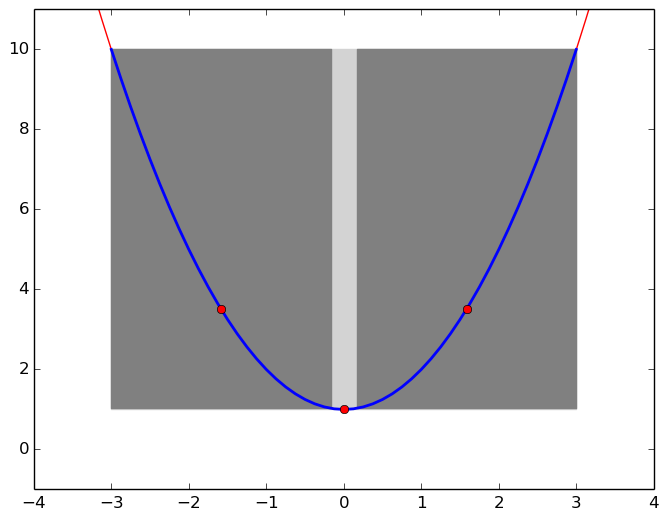

In [415]:
eme=ptomedio(interv1)
graficaarea(float64(interv1.a),float64(interv1.b),f1)
PyPlot.plot(Float64[eme],Float64[f1(eme)],"or")

interv2=newtonPolos(interv1,f1,f1(ValorDeriv(interv1)).deriv)[1]
interv3=newtonPolos(interv1,f1,f1(ValorDeriv(interv1)).deriv)[2]
polY2=f1(interv2)
polY3=f1(interv3)
PyPlot.fill_between(Float64[interv2.a,interv2.b],float64(polY2.a),float64(polY2.b),color="gray")
PyPlot.plot(Float64[ptomedio(interv2)],Float64[f1(ptomedio(interv2))],"or")
PyPlot.fill_between(Float64[interv3.a,interv3.b],float64(polY3.a),float64(polY3.b),color="gray")
PyPlot.plot(Float64[ptomedio(interv3)],Float64[f1(ptomedio(interv3))],"or")


;

#[4]
##### Considera la familia de polinomios de Wilkinson definidos por $W_n(x)=∏^n_{i=1}(x−i)$. Partiendo de un intervalo simétrico alrededor de cero, implementa el método de Newton para encontrar sus raíces, utilizando diferenciación automática.

In [416]:
function wilkinson(x,n::Int64)
    a=(x-1)
    for i=2:n
        a=a*(x-i)
    end
    return a
end

wilkinson (generic function with 1 method)

Para n=1 debe ser fácil ya que su derivada es constante:

In [417]:
n=1;
f3(x)=wilkinson(x,n)
interv8=Intervalo(-3,3)
cerosNewton(interv8,f3)

[1e+00,
1e+00]

Para n>1 hay problemas con los ceros:

In [418]:
n=2;
f3(x)=wilkinson(x,n)
interv8=Intervalo(-3,3)
cerosNewton(interv8,f3)

"El intervalo de la derivada contiene al cero"

Por lo que utilizaremos lo visto en $\mathbf{[5]}$

##### ¡¡¡OJO, LOS SIGUIENTES RENGLONES NO CORRERAN SI NO SE CORREN PRIMERO LOS EJERCICIOS $\mathbf{[5],[6]}$!!!

In [419]:
n=2;
f3(x)=wilkinson(x,n)
interv8=Intervalo(-3,3)
cerosNewtonExtend(interv8,f3)

2-element Array{Intervalo,1}:
 [9.999999999999999998155997061966351108210856219083849356502771708433450575411437e-01,
1.000000000000000000171824893675646323257987171146879414578688496973363273297247e+00]
 [1.999999999994603790865697743381402149251108492029768575480125154411250070162069e+00,
2.000000000006012232641448098931943215126567463711357178491711117934244974116473e+00]

Que es lo que esperabamos (ceros en 1, 2)

A continuación pongo una gráfica para ver el método

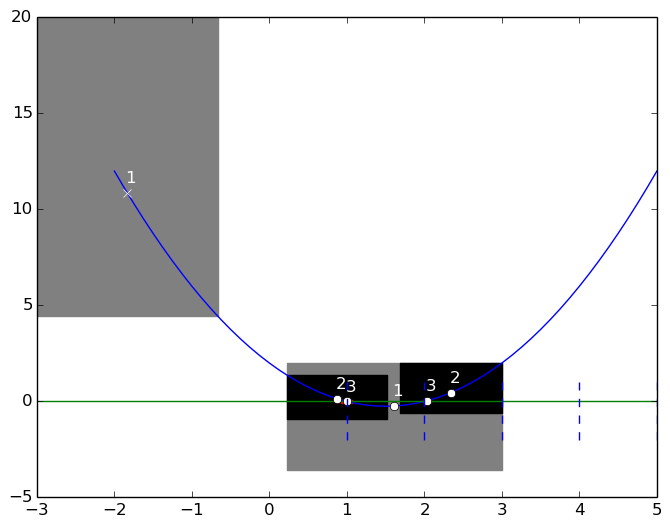

In [420]:
x=-2:2.0^-3:5
y=similar(x)
for i=1:length(x)
    y[i]=f3(x[i])
end
PyPlot.plot(x,y)
PyPlot.plot([-3,5],zeros(2))

interv2=newtonPolos(interv8,f3,f3(ValorDeriv(interv8)).deriv)[1]
interv3=newtonPolos(interv8,f3,f3(ValorDeriv(interv8)).deriv)[2]
polY2=f3(interv2)
polY3=f3(interv3)
PyPlot.fill_between(Float64[interv2.a,interv2.b],float64(polY2.a),float64(polY2.b),color="gray")
PyPlot.plot(Float64[ptomedio(interv2)],Float64[f3(ptomedio(interv2))],"ow")
PyPlot.fill_between(Float64[interv3.a,interv3.b],float64(polY3.a),float64(polY3.b),color="gray")
PyPlot.plot(Float64[ptomedio(interv3)],Float64[f3(ptomedio(interv3))],"xw")

interv4=newtonPolos(interv2,f3,f3(ValorDeriv(interv2)).deriv)[1]
interv5=newtonPolos(interv2,f3,f3(ValorDeriv(interv2)).deriv)[2]
polY4=f3(interv4)
polY5=f3(interv5)
PyPlot.fill_between(Float64[interv4.a,interv4.b],float64(polY4.a),float64(polY4.b),color="black")
PyPlot.plot(Float64[ptomedio(interv4)],Float64[f3(ptomedio(interv4))],"ow")
PyPlot.fill_between(Float64[interv5.a,interv5.b],float64(polY5.a),float64(polY5.b),color="black")
PyPlot.plot(Float64[ptomedio(interv5)],Float64[f3(ptomedio(interv5))],"ow")

interv6biz=newtonPolos(interv4,f3,f3(ValorDeriv(interv4)).deriv)[1]
interv6=newtonPolos(interv6biz,f3,f3(ValorDeriv(interv6biz)).deriv)[1]
polY6=f3(interv6)
PyPlot.fill_between(Float64[interv6.a,interv6.b],float64(polY6.a),float64(polY6.b),color="red")
PyPlot.plot(Float64[ptomedio(interv6)],Float64[f3(ptomedio(interv6))],"ow")

interv7biz=newtonIntervaloExtend(interv5,f3)
interv7=newtonIntervaloExtend(interv7biz,f3)
polY7=f3(interv7)
PyPlot.fill_between(Float64[interv7.a,interv7.b],float64(polY7.a),float64(polY7.b),color="red")
PyPlot.plot(Float64[ptomedio(interv7)],Float64[f3(ptomedio(interv7))],"ow")

PyPlot.annotate("1",xy=(0, 0), xytext=(float64(ptomedio(interv2)),0.5+float64(f3(ptomedio(interv2)))), color="white")
PyPlot.annotate("1",xy=(0, 0), xytext=(float64(ptomedio(interv3)),0.5+float64(f3(ptomedio(interv3)))), color="white")
PyPlot.annotate("2",xy=(0, 0), xytext=(float64(ptomedio(interv4)),0.5+float64(f3(ptomedio(interv4)))), color="white")
PyPlot.annotate("2",xy=(0, 0), xytext=(float64(ptomedio(interv5)),0.5+float64(f3(ptomedio(interv5)))), color="white")
PyPlot.annotate("3",xy=(0, 0), xytext=(float64(ptomedio(interv6)),0.5+float64(f3(ptomedio(interv6)))), color="white")
PyPlot.annotate("3",xy=(0, 0), xytext=(float64(ptomedio(interv7)),0.5+float64(f3(ptomedio(interv7)))), color="white")

PyPlot.plot([1,1],[-2,1],"--b")
PyPlot.plot(2*[1,1],[-2,1],"b--")
PyPlot.plot(3*[1,1],[-2,1],"b--")
PyPlot.plot(4*[1,1],[-2,1],"b--")
PyPlot.plot(5*[1,1],[-2,1],"b--");

Y podemos seguir con n's mayores

In [421]:
n=3;
f3(x)=wilkinson(x,n)
interv8=Intervalo(-3,3)
cerosNewtonExtend(interv8,f3)

3-element Array{Intervalo,1}:
 [1.999999999999060651037212502745113628405555151212758086901089187815144296576921e+00,
2.000000000000939381351568138295555184743266798034539413001264974319286480141766e+00]
 [2.999999999969176580097394573465092054338969001453923403727582830868754626145685e+00,
3e+00]                                                                               
 [9.999999999999999994543924578535230927182482124109948166750261559045679461914948e-01,
1.000000000000000000514503267371896848684802320550721938132477348085361382386436e+00]

In [422]:
n=4;
f3(x)=wilkinson(x,n)
interv8=Intervalo(-5,5)
cerosNewtonExtend(interv8,f3)

4-element Array{Intervalo,1}:
 [2.999999999999999999981136915237848026649966043526898277501850551720310090975441e+00,
3.000000000000000000018864545562766702245756276445428143032445057594866304819489e+00]
 [3.999999999999999963255327494935099918349718753667703632669156874203865652682734e+00,
4.000000000000000039047963430059351977780313250901453381390296449130680804788137e+00]
 [9.999999999999999996560729745244623513004078514021492324355310826089166263479026e-01,
1.000000000000000000333762789639675603365627208873398272135413735291556334026655e+00]
 [1.999999999999999842651380217819609500396366102390286702274764427995614826682292e+00,
2.000000000000000157171402483869887867662713476479255993236753706674045444712612e+00]

# División extendida

#[5]
#### Supón que $F′(X)$ sea un intervalo, digamos $F′(X)=[−a,b]$, que contiene $0$ (con $a,b>0$).
#### (i) Definiendo 1/A como el conjunto {1/x:x∈A}, evalúa 1/F′(X).

Sabemos que $1/F′(X)$ debería dar como resultado dos intervalos: $[-∞,-\frac{1}{a}]$ y $[\frac{1}{b},∞]$

Para trabajar con estos intervalos haré que $1/F′(X)$ no arroje un intervalo sino un arreglo de intervalos:

#### (ii) Define una función que implementa esta "división extendida" de intervalos (o, más bien, inversa extendida).

In [4]:
extenDiv(x::Intervalo)=[Intervalo(-inf(BigFloat),(1/Intervalo(x.a)).b),Intervalo((1/Intervalo(x.b)).a,inf(BigFloat))]

extenDiv (generic function with 1 method)

In [424]:
extenDiv(Intervalo(-3,3))

2-element Array{Intervalo,1}:
 [-inf,
-3.333333333333333333333333333333333333333333333333333333333333333333333333333305e-01]
 [3.333333333333333333333333333333333333333333333333333333333333333333333333333305e-01,
inf]  

Nótese que al definirlo hice que el redondeo incluyera el valor que yo quiero. Si lo hubiera definido como 

    extenDiv(x::Intervalo)=[Intervalo(-inf(BigFloat),1/x.a),Intervalo(1/x.b,inf(BigFloat))]

entonces 

    extenDiv(Intervalo(-3,3))

arroja 

    [ [-inf,-3.333333333333333333333333333333333333333333333333333333333333333333333333333348e-01], 
        [3.333333333333333333333333333333333333333333333333333333333333333333333333333348e-01,inf] ]

Que claramente no contiene los elementos {$-1/3,1/3$}

#[6]
#### Resulta que el método de Newton sigue funcionando si utilizamos esta división extendida cuándo sea apropiado. Impleméntalo para encontrar todas las raíces de una función en un intervalo dado.

#### Nota que hay casos en los cuales no ocurre ninguna de las posibilidades (1) ni (2) en el teorema del método de Newton para intervalos. ¿Qué se puede hacer en este caso?

Voy a definir un nuevo tipo composito para distinguir los distintos tipos de ceros que puede encontrar el método:

In [5]:
type Ceros
    sinRaiz::Array{Intervalo,1} # caso (1) del notebook
    raizUnica::Array{Intervalo,1} # caso (2) del notebook
    raizMasDeUna::Array{Intervalo,1} # ninguno de los anteriores
end

In [6]:
newtonPolosAux(x::Intervalo,f::Function,y::Intervalo)= iNtersectar(x,Intervalo(ptomedio(x)) - f(Intervalo(ptomedio(x)))*y)

function newtonPolos(x::Intervalo,f::Function,y::Intervalo)
    derivs=extenDiv(y)
    a=Intervalo[]
    for i=1:2
        if typeof(newtonPolosAux(x,f,derivs[i]))==ASCIIString
            
        else
            push!(a,newtonPolosAux(x,f,derivs[i]))
        end
    end
    return a
end

newtonPolos (generic function with 1 method)

In [20]:
newtonIntervaloExtend(x::Intervalo,f::Function) = iNtersectar(x,newtonIntervaloExtendAux(x,f))
newtonIntervaloExtendAux(x::Intervalo,f::Function)=
        Intervalo(ptomedio(x)) - f(Intervalo(ptomedio(x)))/(f(ValorDeriv(x)).deriv)


function cerosNewtonExtendAux(x::Array{Intervalo,1},f::Function,n::Int64,z::Ceros)
    for i=1:length(x)
        y=f(ValorDeriv(x[i]))
        if y.deriv.a<0.0 && y.deriv.b>0.0 
            cerosNewtonExtendAux( newtonPolos(x[i],f,y.deriv)  , f , n,z)
        elseif typeof(newtonIntervaloExtend(x[i],f))==ASCIIString    
            push!(z.sinRaiz,x[i])
            #println("El intervalo elegido no contiene ceros de $f(x)")
        elseif n>100
            println("En $(x[i]) Más de 100 iteraciones")
            #return(z)
        elseif abs(redonUP(-,x[i].b,x[i].a))<2.0^-30 
            if in(newtonIntervaloExtendAux(x[i],f),x[i])
                push!(z.raizUnica,x[i])
            else
                push!(z.raizMasDeUna,x[i])
            end
        else
            ##println("pasan:")
            ##println(x[i])
            ##println()
            n+=1
            #println("$(x[i])")
            cerosNewtonExtendAux( [newtonIntervaloExtend(x[i],f)]  , f , n,z)
        end
    end
    return z
end
cerosNewtonExtend(x::Intervalo,f::Function)=cerosNewtonExtendAux([x],f,1,Ceros(Intervalo[],Intervalo[],Intervalo[]))

cerosNewtonExtend (generic function with 1 method)

In [427]:
f1(x)=x^3-1
interv1=Intervalo(-3,3)
println(cerosNewton(interv1,f1))
interv1=Intervalo(0,3)
println(cerosNewton(interv1,f1))
interv1=Intervalo(3,13)
println(cerosNewton(interv1,f1))

[9.999999999996766945433800838764672234217058898840182419042737791180041684117653e-01,
1.00000000000035560775191859952649349832031965423996115501097468381781371997584e+00]
[9.999999999996455746958370586872576732910155438046615480108400544854991344102032e-01,
1.00000000000039142809569346024873314200851275964043658576342252110557003319485e+00]
El intervalo elegido no contiene ceros de f1(x)


In [21]:
f1(x)=x^3-1
interv1=Intervalo(-3,3)
println(cerosNewtonExtend(interv1,f1))
interv1=Intervalo(0,3)
println(cerosNewtonExtend(interv1,f1))
interv1=Intervalo(3,13)
println(cerosNewtonExtend(interv1,f1))

Ceros([],[[9.999999999996766945433800838764672234217058898840182419042737791180041684117653e-01,
1.00000000000035560775191859952649349832031965423996115501097468381781371997584e+00]],[])
Ceros([],[[9.999999999996455746958370586872576732910155438046615480108400544854991344102032e-01,
1.00000000000039142809569346024873314200851275964043658576342252110557003319485e+00]],[])
Ceros([[3e+00,
4.152628720173893722556561644143262276064957318843213445586291616646086746638413e+00]],[],[])


Ahora para $f(x)=x^2-1$, la cual tiene derivada $2x$ que se hace cero en $(-3,3)$

In [430]:
f1(x)=x^2-1
interv1=Intervalo(-3,3)
println(cerosNewton(interv1,f1))
interv1=Intervalo(0,3)
println(cerosNewton(interv1,f1))
interv1=Intervalo(3,13)
println(cerosNewton(interv1,f1))

El intervalo de la derivada contiene al cero
[9.999999999999999818070336260818762212836466401569907606283975886159996237057381e-01,
1.000000000000000018484792426209236554433405630564611521146908370944471311548792e+00]
El intervalo elegido no contiene ceros de f1(x)


In [22]:
f1(x)=x^2-1
interv1=Intervalo(-3,3)
println(cerosNewtonExtend(interv1,f1))
println("Nótese que el programa separa y encuentra los ceros al rededor de +-1")
println()
interv1=Intervalo(0,3)
println(cerosNewtonExtend(interv1,f1))
println()
interv1=Intervalo(3,13)
println(cerosNewtonExtend(interv1,f1))

Ceros([],[[-1.000000000116555949760334967198204461460207626849085879682821950118675275773075e+00,
-9.999999998874207384013877142596300523171748517271878457416413873980464490940146e-01],[9.999999998874207384013877142596300523171748517271878457416413873980464490940146e-01,
1.000000000116555949760334967198204461460207626849085879682821950118675275773075e+00]],[])
Nótese que el programa separa y encuentra los ceros al rededor de +-1

Ceros([],[[9.999999999999999818070336260818762212836466401569907606283975886159996237057381e-01,
1.000000000000000018484792426209236554433405630564611521146908370944471311548792e+00]],[])

Ceros([[3e+00,
5.576923076923076923076923076923076923076923076923076923076923076923076923076982e+00]],[],[])


#[7]
#### Implementa pruebas (tests) para tu código.

In [23]:
using FactCheck

In [41]:
facts("Probando división extendida")do 
    var1=extenDiv(Intervalo(-3,3))
    @fact in(-1//3,var1[1]) => true
    @fact in(1//3,var1[2]) => true
end;

facts("Probando Metodo Newton")do 
    f1(x)=x^2-1
    interv1=Intervalo(-3,3)
    var1=cerosNewtonExtend(interv1,f1)
    @fact var1.sinRaiz => Intervalo[]
    @fact var1.raizMasDeUna => Intervalo[]
    @fact length(var1.raizUnica) => 2
    @fact in(-1,var1.raizUnica[1]) => true
    @fact in(1,var1.raizUnica[2]) => true
    interv2=Intervalo(3,4)
    var2=cerosNewtonExtend(interv2,f1)
    @fact var2.raizUnica => Intervalo[]
    @fact var2.raizMasDeUna => Intervalo[]
    @fact length(var2.sinRaiz) => 1
end;

Probando división extendida
2 facts verified.
Probando Metodo Newton
8 facts verified.
